In [15]:
!pip install pylatexenc


  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=9a8605ddbf2de9a8ad8d1363c841021075b43cc078844c0bdc21f0b6b331a7aa
  Stored in directory: /home/padmapriya/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [1]:
import pennylane as qml
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
import pandas as pd
import argparse
import os
import math
import datetime
import time
from frechetdist import frdist

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch

from solver import Solver
from data_loader import get_loader
from torch.backends import cudnn
from utils import *
from models import Generator, Discriminator
from data.sparse_molecular_dataset import SparseMolecularDataset
from rdkit import Chem

import pennylane as qml
from qiskit import IBMQ
import time
import qiskit
import random
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer


In [2]:
layers = 1
qubits = 8

z1 = random.uniform(-1, 1)
z2 = random.uniform(-1, 1)

In [3]:
g = torch.tensor(list(np.random.rand(layers*(qubits*2-1))*2*np.pi-np.pi))
w = g.tolist()
qc = QuantumCircuit(qubits)

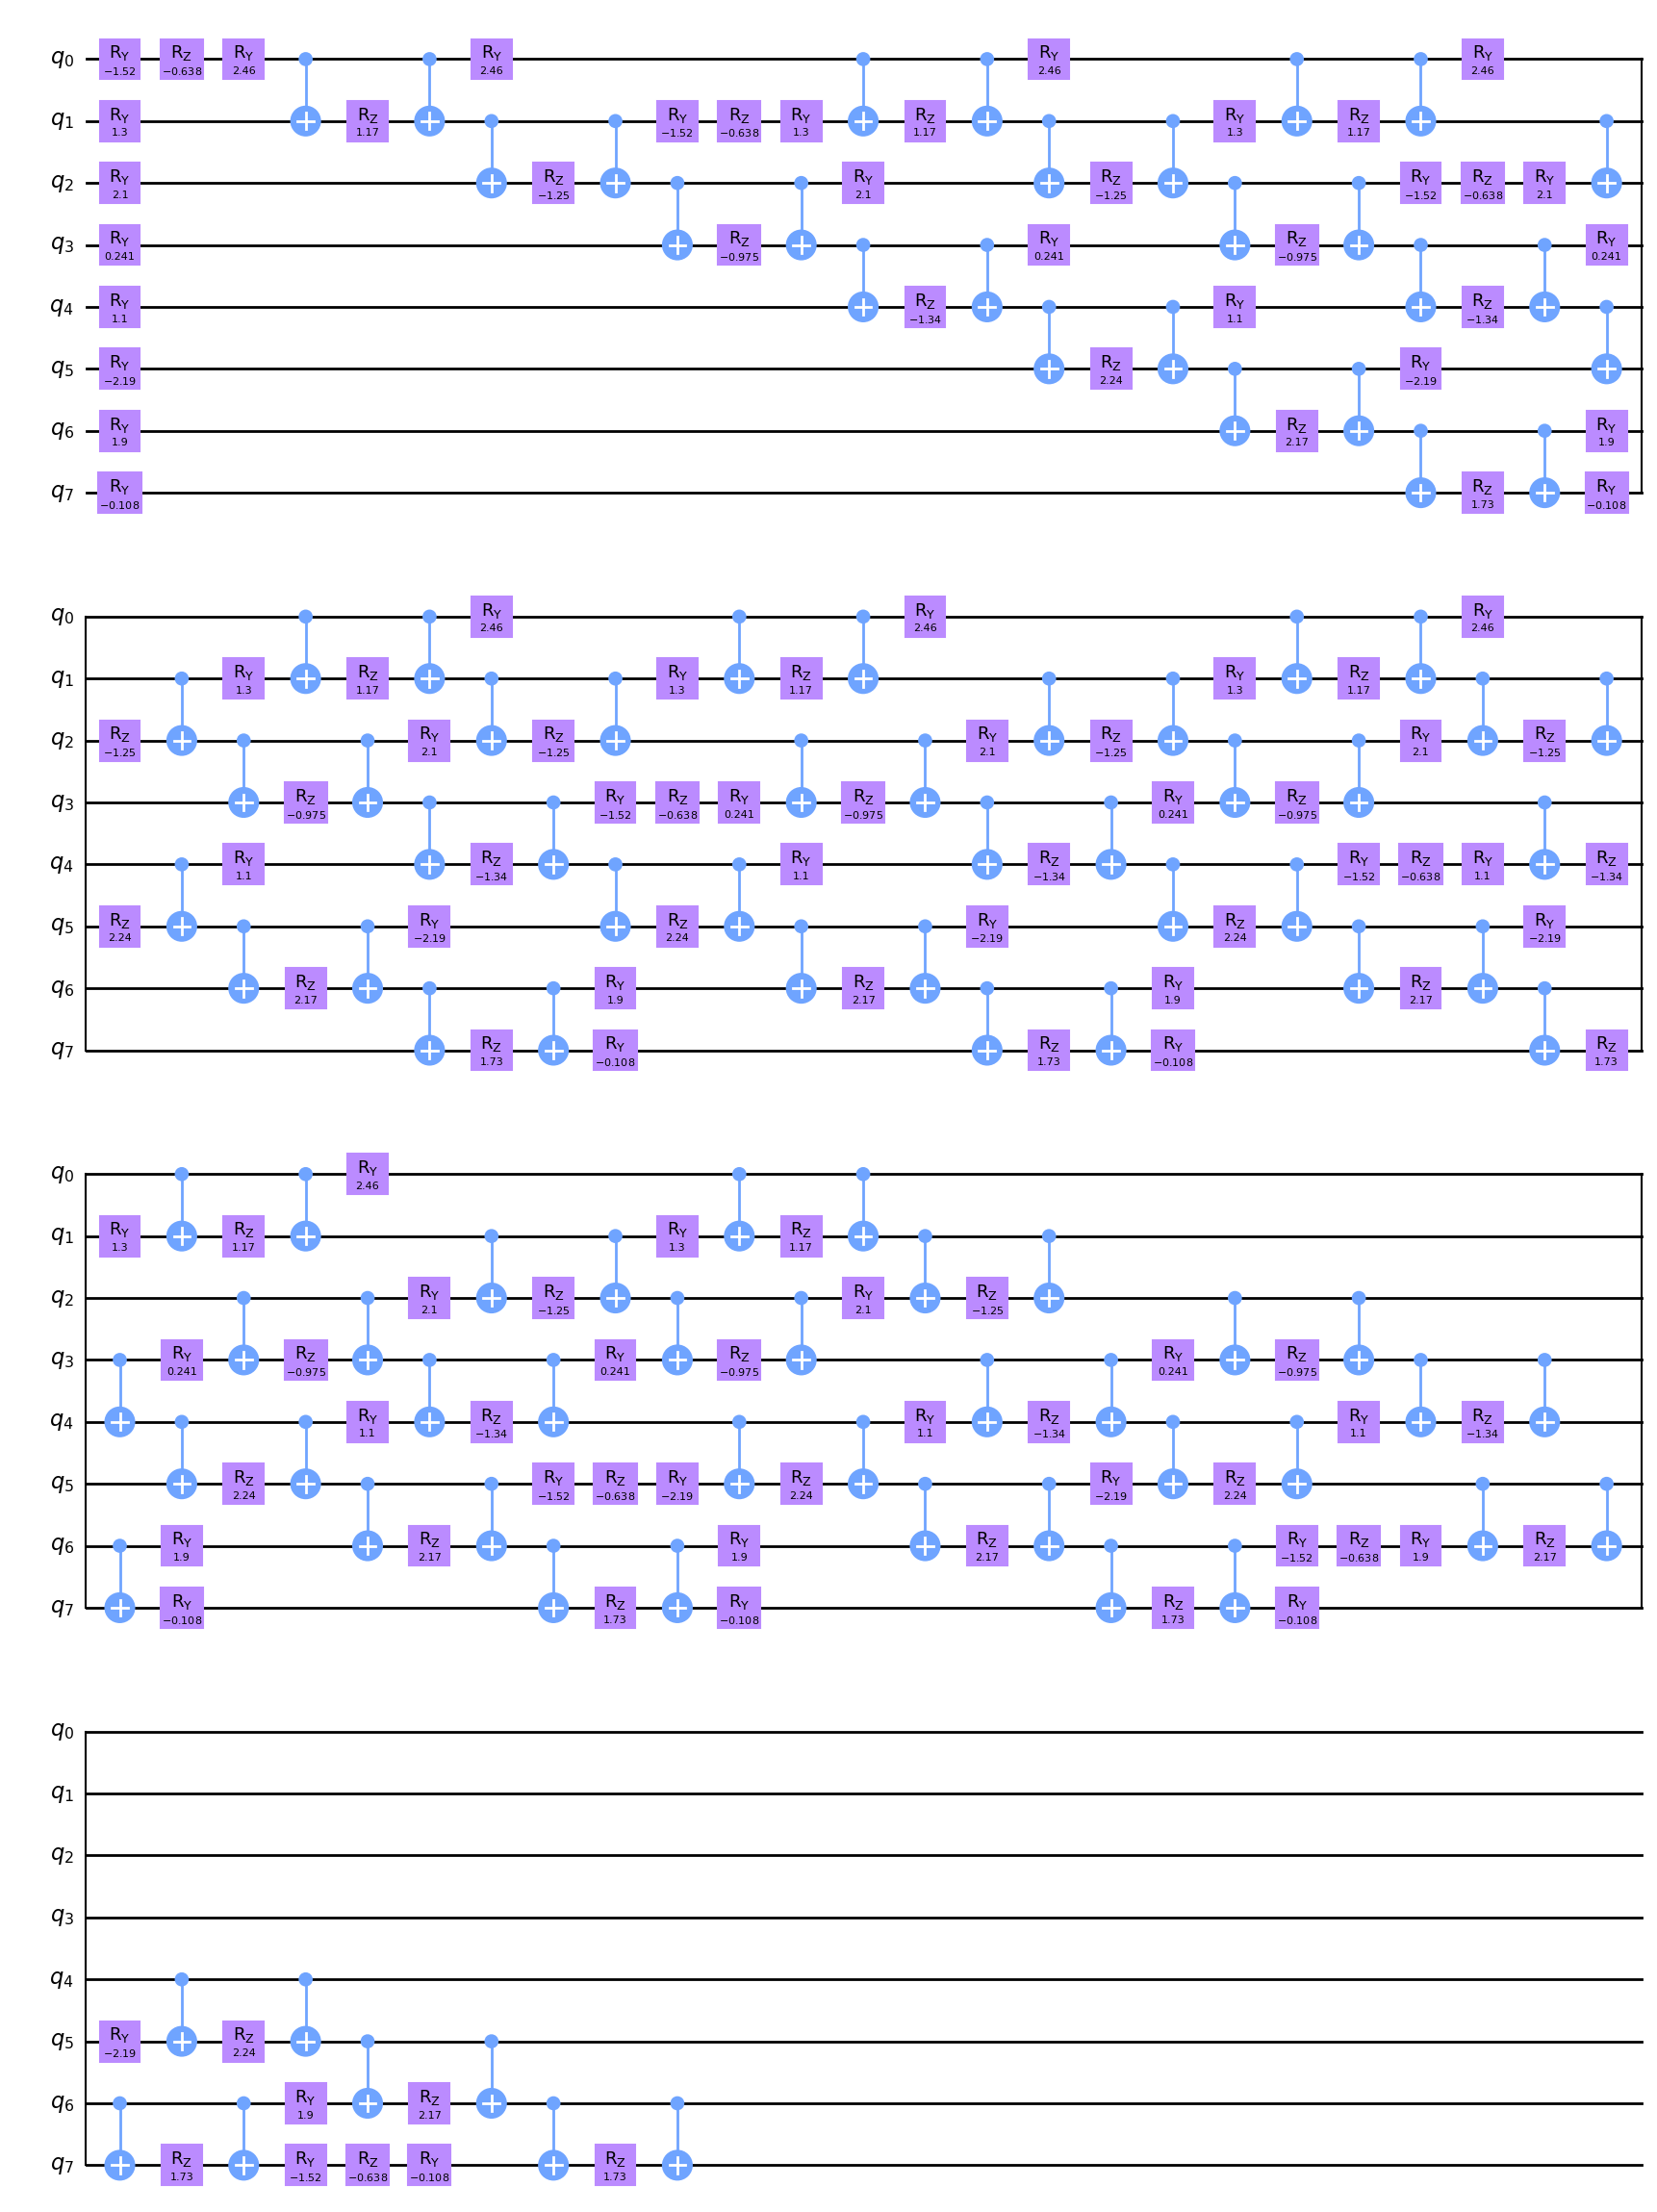

In [4]:
for i in range(qubits):
    qc.ry(np.arcsin(z1), i)
    qc.rz(np.arcsin(z2), i)
    for l in range(layers):
        for i in range(qubits):
            qc.ry(w[i], i)
        for i in range(qubits-1):
            qc.cx(i, i+1)
            qc.rz(w[i+qubits], i+1)
            qc.cx(i, i+1)
qc.draw(output = 'mpl')